In [230]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

from imblearn.over_sampling import SMOTE
import sys
sys.path.append('/Users/hurrywish/Downloads/Data_analysis_package/')
from RandomTree_fillna import regr_fillna
from sklearn.model_selection import train_test_split

# Simple Process of the original data, mainly drop duplicates
data = pd.read_csv('/Users/hurrywish/Desktop/Jupyter/rankingcard.csv', index_col=0)
data.drop_duplicates(inplace=True)
data.reset_index(drop=True, inplace=True)

# Use RandomForest to fill nan values
data1 = data.copy()
data2 = regr_fillna(data1)
data2.drop(index=data2[data2.age == 0].index, inplace=True)
data2.drop(index=data2[data2['NumberOfTimes90DaysLate'] > 90].index, inplace=True)
data2.reset_index(drop=True, inplace=True)

# setting targets
label = data2['SeriousDlqin2yrs']
sample = data2[[i for i in data2.columns if i != 'SeriousDlqin2yrs']]

# up-sample
sm = SMOTE(random_state=0)
sample_sm, label_sm = sm.fit_sample(sample, label)
# print(sample_sm.shape, label_sm.shape)





[0, 1, 2, 3, 4, 6, 7, 8, 9, 10, 5]
SeriousDlqin2yrs 无空值
RevolvingUtilizationOfUnsecuredLines 无空值
age 无空值
NumberOfTime30-59DaysPastDueNotWorse 无空值
DebtRatio 无空值
NumberOfOpenCreditLinesAndLoans 无空值
NumberOfTimes90DaysLate 无空值
NumberRealEstateLoansOrLines 无空值
NumberOfTime60-89DaysPastDueNotWorse 无空值


/Users/hurrywish/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


NumberOfDependents列，得分:0.88


/Users/hurrywish/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


MonthlyIncome列，得分:0.84


In [29]:
x_train, x_test, y_train, y_test = train_test_split(sample_sm, label_sm, train_size=0.8,random_state=0)
data_train = pd.concat([y_train, x_train], axis=1)
data_test = pd.concat([y_test,x_test], axis=1)


In [232]:
data1.describe()

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
count,149391.000000,149391.000000,149391.000000,149391.000000,149391.000000,1.201700e+05,149391.000000,149391.000000,149391.000000,149391.000000,145563.000000
mean,0.066999,6.071087,52.306237,0.393886,354.436740,6.675098e+03,8.480892,0.238120,1.022391,0.212503,0.759863
std,0.250021,250.263672,14.725962,3.852953,2041.843455,1.438958e+04,5.136515,3.826165,1.130196,3.810523,1.116141
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.030132,41.000000,0.000000,0.177441,3.400000e+03,5.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.154235,52.000000,0.000000,0.368234,5.400000e+03,8.000000,0.000000,1.000000,0.000000,0.000000
75%,0.000000,0.556494,63.000000,0.000000,0.875279,8.250000e+03,11.000000,0.000000,2.000000,0.000000,1.000000
max,1.000000,50708.000000,109.000000,98.000000,329664.000000,3.008750e+06,58.000000,98.000000,54.000000,98.000000,20.000000


In [241]:
data1['NumberOfOpenCreditLinesAndLoans'].value_counts().sort_index()

0      1712
1      4251
2      6558
3      8992
4     11566
5     12916
6     13607
7     13242
8     12559
9     11355
10     9623
11     8321
12     7005
13     5667
14     4546
15     3645
16     3000
17     2370
18     1874
19     1433
20     1169
21      864
22      685
23      533
24      422
25      337
26      239
27      194
28      150
29      114
30       88
31       74
32       52
33       47
34       35
35       27
36       18
37        7
38       13
39        9
40       10
41        4
42        8
43        8
44        2
45        8
46        3
47        2
48        6
49        4
50        2
51        2
52        3
53        1
54        4
56        2
57        2
58        1
Name: NumberOfOpenCreditLinesAndLoans, dtype: int64

In [246]:
pd.qcut(data1['NumberOfOpenCreditLinesAndLoans'],q=4).value_counts()

(-0.001, 5.0]    45995
(5.0, 8.0]       39408
(11.0, 58.0]     34689
(8.0, 11.0]      29299
Name: NumberOfOpenCreditLinesAndLoans, dtype: int64

In [43]:
label='age'
age_cats, retbins = pd.qcut(data_train[label], retbins=True, q=20)
data_train['age_cats']=age_cats
data_train[data_train.SeriousDlqin2yrs==0].groupby('age_cats').count()['SeriousDlqin2yrs']

age_cats
(20.999, 28.0]    4803
(28.0, 31.0]      4001
(31.0, 34.0]      4595
(34.0, 36.0]      3314
(36.0, 39.0]      5935
(39.0, 41.0]      4516
(41.0, 43.0]      4561
(43.0, 45.0]      5003
(45.0, 47.0]      5404
(47.0, 48.0]      2809
(48.0, 50.0]      5619
(50.0, 52.0]      5400
(52.0, 54.0]      5349
(54.0, 56.0]      5294
(56.0, 58.0]      5145
(58.0, 61.0]      7636
(61.0, 64.0]      7890
(64.0, 68.0]      7621
(68.0, 74.0]      7745
(74.0, 109.0]     8817
Name: SeriousDlqin2yrs, dtype: int64

In [44]:
str('label'+'cats')

'labelcats'

In [46]:
label = 'age'
data_bin = data_train.copy()
cats, retbins = pd.qcut(data_bin[label], retbins=True, q=20)
cats_name=str(label + '_cats')
data_bin[cats_name] = cats
SD2_0 = data_train[data_train.SeriousDlqin2yrs == 0].groupby(cats_name).count()['SeriousDlqin2yrs']
SD2_1 = data_train[data_train.SeriousDlqin2yrs == 1].groupby(cats_name).count()['SeriousDlqin2yrs']

df = pd.DataFrame({'low_limit': retbins[0:-1],
                   'high_limit': retbins[1:],
                   'SD2_0': SD2_0.values,
                   'SD2_1': SD2_1.values
                   })
print(df)

    low_limit  high_limit  SD2_0  SD2_1
0        21.0        28.0   4803   8385
1        28.0        31.0   4001   6706
2        31.0        34.0   4595   7904
3        34.0        36.0   3314   5335
4        36.0        39.0   5935   8657
5        39.0        41.0   4516   6771
6        41.0        43.0   4561   6489
7        43.0        45.0   5003   6795
8        45.0        47.0   5404   7276
9        47.0        48.0   2809   3589
10       48.0        50.0   5619   7005
11       50.0        52.0   5400   6624
12       52.0        54.0   5349   5565
13       54.0        56.0   5294   4810
14       56.0        58.0   5145   4037
15       58.0        61.0   7636   5498
16       61.0        64.0   7890   3671
17       64.0        68.0   7621   2635
18       68.0        74.0   7745   2100
19       74.0       109.0   8817   1558


In [47]:
label = 'age'
data_bin = data_train.copy()
cats, retbins = pd.qcut(data_bin[label], retbins=True, q=20)
cats_name = str(label + '_cats')
data_bin[cats_name] = cats

SD2_0 = data_bin[data_train['SeriousDlqin2yrs'] == 0].groupby([cats_name]).count()['SeriousDlqin2yrs']
SD2_1 = data_bin[data_train['SeriousDlqin2yrs'] == 1].groupby(cats_name).count()['SeriousDlqin2yrs']

df = pd.DataFrame({'low_limit': retbins[0:-1],
                   'high_limit': retbins[1:],
                   'SD2_0': SD2_0.values,
                   'SD2_1': SD2_1.values
                   })

In [48]:
df

,low_limit,high_limit,SD2_0,SD2_1
0,21.0,28.0,4803,8385
1,28.0,31.0,4001,6706
2,31.0,34.0,4595,7904
3,34.0,36.0,3314,5335
4,36.0,39.0,5935,8657
5,39.0,41.0,4516,6771
6,41.0,43.0,4561,6489
7,43.0,45.0,5003,6795
8,45.0,47.0,5404,7276
9,47.0,48.0,2809,3589


In [79]:
def chi2_contingency_test(data, number=2):
    from scipy.stats import chi2_contingency
    data_chi2 = data.copy()

    iv_list = list()
    len_data = list()

    while len(data_chi2) > number:

        data_chi2['total'] = data_chi2['SD2_0'] + data_chi2['SD2_1']
        data_chi2['percentage'] = data_chi2['total'] / data_chi2['total'].sum()
        data_chi2['good%'] = data_chi2.SD2_0 / data_chi2.SD2_0.sum()
        data_chi2['bad%'] = data_chi2.SD2_1 / data_chi2.SD2_1.sum()
        data_chi2['woe'] = np.log(data_chi2['good%'] / data_chi2['bad%'])
        iv = np.sum((data_chi2['good%'] - data_chi2['bad%']) * data_chi2['woe'])
        iv_list.append(iv)
        len_data.append(len(data_chi2))

        p_values = list()
        for i in range(len(data_chi2) - 1):
            SD2_i = data_chi2[['SD2_0', 'SD2_1']].iloc[i]
            SD2_i_1 = data_chi2[['SD2_0', 'SD2_1']].iloc[i + 1]
            p_value = chi2_contingency([SD2_i, SD2_i_1])[1]
            p_values.append(p_value)

        index = np.argsort(p_values)[-1]
        # print(index)
        data_chi2['SD2_0'].iloc[index + 1] += data_chi2['SD2_0'].iloc[index]
        data_chi2['SD2_1'].iloc[index + 1] += data_chi2['SD2_1'].iloc[index]
        data_chi2['low_limit'].iloc[index + 1] = data_chi2['low_limit'].iloc[index]
        data_chi2.drop(index=index, axis=0, inplace=True)
        data_chi2.reset_index(drop=True, inplace=True)

    return len_data[::-1], iv_list[::-1]


len_data, iv_list = chi2_contingency_test(df)
iv_increase=[(iv_list[i+1]-iv_list[i])/iv_list[i] for i in range(len(iv_list)-1)]
print(iv_increase)

[0.051245095394338365, 0.01983069598176105, 0.016328543692268764, 0.00984683443223932, 0.004295228778157648, 0.003716567872306566, 0.0012036716320805488, 0.001084774843318244, 0.0004986098220855925, 0.0003577621592996516, 0.00013171828959137005, 7.521424378251454e-05, 6.669115943304472e-05, 6.006893762682519e-05, 4.8381317682983655e-05, 2.006856763189482e-05, 5.775002182592337e-06]


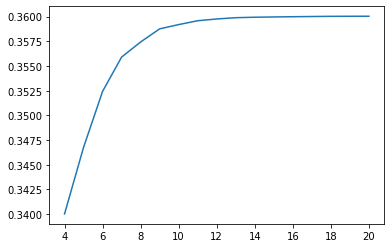

In [80]:
from matplotlib import pyplot as plt
%matplotlib inline

a=chi2_contingency_test(df,3)[0]
b=chi2_contingency_test(df,3)[1]
plt.plot(a,b)

In [106]:
iv_increase = [(iv_list[i + 1] - iv_list[i]) / iv_list[i] for i in range(len(iv_list) - 1)]
for i, j in enumerate(iv_increase):
    if j < 10 ** -3:
        print(len_data[i - 1])
        break
        
        
        

10


In [97]:
iv_increase

[0.051245095394338365,
 0.01983069598176105,
 0.016328543692268764,
 0.00984683443223932,
 0.004295228778157648,
 0.003716567872306566,
 0.0012036716320805488,
 0.001084774843318244,
 0.0004986098220855925,
 0.0003577621592996516,
 0.00013171828959137005,
 7.521424378251454e-05,
 6.669115943304472e-05,
 6.006893762682519e-05,
 4.8381317682983655e-05,
 2.006856763189482e-05,
 5.775002182592337e-06]

In [108]:
data_train.describe().T

,count,mean,std,min,25%,50%,75%,max
SeriousDlqin2yrs,222867.0,0.499895,0.500001,0.0,0.000000,0.000000,1.000000,1.0
RevolvingUtilizationOfUnsecuredLines,222867.0,5.135796,206.756337,0.0,0.099867,0.466469,0.873740,50708.0
age,222867.0,49.076225,13.888699,21.0,39.000000,48.000000,58.000000,109.0
NumberOfTime30-59DaysPastDueNotWorse,222867.0,0.419685,0.864853,0.0,0.000000,0.000000,1.000000,12.0
DebtRatio,222867.0,328.112972,1795.337549,0.0,0.208588,0.401731,0.852323,329664.0
MonthlyIncome,222867.0,5129.992028,9942.214063,0.0,2000.000000,4166.613653,6900.000000,3008750.0
NumberOfOpenCreditLinesAndLoans,222867.0,7.985467,5.014988,0.0,4.000000,7.000000,11.000000,57.0
NumberOfTimes90DaysLate,222867.0,0.228778,0.721682,0.0,0.000000,0.000000,0.000000,17.0
NumberRealEstateLoansOrLines,222867.0,0.876325,1.126067,0.0,0.000000,1.000000,1.000000,32.0
NumberOfTime60-89DaysPastDueNotWorse,222867.0,0.118295,0.425180,0.0,0.000000,0.000000,0.000000,11.0


In [120]:
data_train['NumberOfTime30-59DaysPastDueNotWorse'].value_counts()

0     164130
1      37294
2      13119
3       5175
4       1958
5        779
6        248
7         93
8         43
9         18
10         7
12         2
11         1
Name: NumberOfTime30-59DaysPastDueNotWorse, dtype: int64

In [125]:
manual_col_bins={
    'NumberOfTime30-59DaysPastDueNotWorse':[0,1,2,13],
    'NumberOfTimes90DaysLate':[0,1,2,17],
    'NumberOfTime60-89DaysPastDueNotWorse':[0,1,2,8],
    'NumberOfDependents':[0,1,2,3]
}
manual_col_bins.items()

dict_items([('NumberOfTime30-59DaysPastDueNotWorse', [0, 1, 2, 13]), ('NumberOfTimes90DaysLate', [0, 1, 2, 17]), ('NumberOfTime60-89DaysPastDueNotWorse', [0, 1, 2, 8]), ('NumberOfDependents', [0, 1, 2, 3])])

In [142]:
sorted(list(set(np.ravel(df[['low_limit','high_limit']]))))

[21.0,
 28.0,
 31.0,
 34.0,
 36.0,
 39.0,
 41.0,
 43.0,
 45.0,
 47.0,
 48.0,
 50.0,
 52.0,
 54.0,
 56.0,
 58.0,
 61.0,
 64.0,
 68.0,
 74.0,
 109.0]

In [144]:
inf=np.inf
bins={'NumberOfTime30-59DaysPastDueNotWorse': [-inf, 0, 1, 2, 13, inf], 'NumberOfTimes90DaysLate': [-inf, 0, 1, 2, 17, inf], 'NumberOfTime60-89DaysPastDueNotWorse': [-inf, 0, 1, 2, 8, inf], 'NumberOfDependents': [-inf, 0, 1, 2, 3, inf], 'RevolvingUtilizationOfUnsecuredLines': [-inf, 0.0, 0.015632649800000002, 0.06080796847246837, 0.09989083696333154, 0.1536528681563451, 0.2213762288816312, 0.38005473289999997, 0.55226332361258, 0.7234813883972794, 0.9826183729919363, 0.9999998999999999, 50708.0, inf], 'age': [-inf, 21.0, 36.0, 43.0, 52.0, 56.0, 61.0, 64.0, 74.0, 109.0, inf], 'DebtRatio': [-inf, 0.0, 0.0179028862, 0.07640002866724707, 0.36016024926407136, 0.40166277, 0.5047427140050286, 0.5751129325325065, 0.851699020289066, 1.4897353479436528, 149.0, 1000.0, 2317.0, 329664.0, inf], 'MonthlyIncome': [-inf, 0.0, 0.1, 0.31, 7.139586239783998, 1200.0, 2000.0, 2500.0, 3333.0, 4166.0, 4600.0, 5599.866394391742, 6900.0, 7702.240550679437, 10208.0, 13000.0, 3008750.0, inf], 'NumberOfOpenCreditLinesAndLoans': [-inf, 0.0, 1.0, 2.0, 3.0, 5.0, 7.0, 8.0, 17.0, 57.0, inf]}

In [145]:
bins

{'NumberOfTime30-59DaysPastDueNotWorse': [-inf, 0, 1, 2, 13, inf],
 'NumberOfTimes90DaysLate': [-inf, 0, 1, 2, 17, inf],
 'NumberOfTime60-89DaysPastDueNotWorse': [-inf, 0, 1, 2, 8, inf],
 'NumberOfDependents': [-inf, 0, 1, 2, 3, inf],
 'RevolvingUtilizationOfUnsecuredLines': [-inf,
  0.0,
  0.015632649800000002,
  0.06080796847246837,
  0.09989083696333154,
  0.1536528681563451,
  0.2213762288816312,
  0.38005473289999997,
  0.55226332361258,
  0.7234813883972794,
  0.9826183729919363,
  0.9999998999999999,
  50708.0,
  inf],
 'age': [-inf, 21.0, 36.0, 43.0, 52.0, 56.0, 61.0, 64.0, 74.0, 109.0, inf],
 'DebtRatio': [-inf,
  0.0,
  0.0179028862,
  0.07640002866724707,
  0.36016024926407136,
  0.40166277,
  0.5047427140050286,
  0.5751129325325065,
  0.851699020289066,
  1.4897353479436528,
  149.0,
  1000.0,
  2317.0,
  329664.0,
  inf],
 'MonthlyIncome': [-inf,
  0.0,
  0.1,
  0.31,
  7.139586239783998,
  1200.0,
  2000.0,
  2500.0,
  3333.0,
  4166.0,
  4600.0,
  5599.866394391742,
  6

In [150]:
data_woe = data_train.copy()

In [179]:
data_woe['age_cat']=pd.cut(data_woe['age'],bins=bins['age'])
data_age_cat=data_woe.groupby(['SeriousDlqin2yrs'])['age_cat'].value_counts().unstack(0)
data_age_cat['woe']=np.log((data_age_cat[0]/data_age_cat[0].sum())/(data_age_cat[1]/data_age_cat[1].sum()))
data_age_cat

SeriousDlqin2yrs,0,1,woe
age_cat,,,
"(-inf, 21.0]",108,25,1.462834
"(21.0, 36.0]",16605,28305,-0.533756
"(36.0, 43.0]",15012,21917,-0.378834
"(43.0, 52.0]",24235,31289,-0.255891
"(52.0, 56.0]",10643,10375,0.025082
"(56.0, 61.0]",12781,9535,0.292569
"(61.0, 64.0]",7890,3671,0.764710
"(64.0, 74.0]",15366,4735,1.176754
"(74.0, 109.0]",8817,1558,1.732857


In [228]:
woe_dict = dict()
for i in bins:
    data_woe = data_train.copy()
    column=str(i) + '_cats'
    data_woe[column] = pd.cut(data_woe[i], bins=bins[i])
    data_middle = data_woe.groupby(['SeriousDlqin2yrs'])[column].value_counts().unstack(0)
    data_middle['woe'] = np.log((data_middle[0] / data_middle[0].sum()) / (data_middle[1] / data_middle[1].sum()))
    woe_dict[i]={i:k for i,k in zip(data_middle.index,data_middle['woe'])}
woe_dict['age']

{Interval(-inf, 21.0, closed='right'): 1.462833626033458,
 Interval(21.0, 36.0, closed='right'): -0.5337563888824743,
 Interval(36.0, 43.0, closed='right'): -0.3788344863493685,
 Interval(43.0, 52.0, closed='right'): -0.2558905050029481,
 Interval(52.0, 56.0, closed='right'): 0.025081556719584234,
 Interval(56.0, 61.0, closed='right'): 0.29256867787463375,
 Interval(61.0, 64.0, closed='right'): 0.7647102541205246,
 Interval(64.0, 74.0, closed='right'): 1.1767537735848406,
 Interval(74.0, 109.0, closed='right'): 1.7328569524337725}

In [229]:

data1

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents,age_cats
85231,0,0.995940,1.176754,1,0.516172,3771.000000,7,0,2,0,0.000000,"(68.0, 74.0]"
250180,1,0.169481,-0.255891,0,0.388638,11297.518342,14,0,3,0,2.801467,"(45.0, 47.0]"
89675,0,1.000000,-0.378834,1,1388.000000,0.100000,3,0,1,0,0.000000,"(36.0, 39.0]"
95916,0,0.180836,0.764710,2,0.483321,5395.000000,18,0,2,0,0.000000,"(61.0, 64.0]"
255133,1,0.896787,-0.378834,1,0.504600,5600.000000,5,3,1,0,3.919397,"(36.0, 39.0]"
...,...,...,...,...,...,...,...,...,...,...,...,...
211543,1,0.574908,-0.255891,1,0.221767,8000.000000,7,0,0,0,0.652309,"(43.0, 45.0]"
86293,0,0.005724,0.764710,0,0.000667,6000.000000,3,0,0,0,0.000000,"(61.0, 64.0]"
122579,1,0.777181,-0.533756,0,0.213362,4250.000000,8,0,0,0,1.000000,"(34.0, 36.0]"
152315,1,0.864164,-0.378834,3,0.362567,6550.000000,9,0,0,3,0.000000,"(41.0, 43.0]"


In [247]:
from sklearn.linear_model import LogisticRegression

c=np.arange(0.01,5,0.1)
regr=LogisticRegression(C=c,max_iter=1000,n_jobs=-1,random_state=0)

Init signature:
LogisticRegression(
    penalty='l2',
    *,
    dual=False,
    tol=0.0001,
    C=1.0,
    fit_intercept=True,
    intercept_scaling=1,
    class_weight=None,
    random_state=None,
    solver='lbfgs',
    max_iter=100,
    multi_class='auto',
    verbose=0,
    warm_start=False,
    n_jobs=None,
    l1_ratio=None,
)
Docstring:     
Logistic Regression (aka logit, MaxEnt) classifier.

In the multiclass case, the training algorithm uses the one-vs-rest (OvR)
scheme if the 'multi_class' option is set to 'ovr', and uses the
cross-entropy loss if the 'multi_class' option is set to 'multinomial'.
(Currently the 'multinomial' option is supported only by the 'lbfgs',
'sag', 'saga' and 'newton-cg' solvers.)

This class implements regularized logistic regression using the
'liblinear' library, 'newton-cg', 'sag', 'saga' and 'lbfgs' solvers. **Note
that regularization is applied by default**. It can handle both dense
and sparse input. Use C-ordered arrays or CSR matrices containi

In [249]:
np.arange(0.01,5,0.01)

array([0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1 , 0.11,
       0.12, 0.13, 0.14, 0.15, 0.16, 0.17, 0.18, 0.19, 0.2 , 0.21, 0.22,
       0.23, 0.24, 0.25, 0.26, 0.27, 0.28, 0.29, 0.3 , 0.31, 0.32, 0.33,
       0.34, 0.35, 0.36, 0.37, 0.38, 0.39, 0.4 , 0.41, 0.42, 0.43, 0.44,
       0.45, 0.46, 0.47, 0.48, 0.49, 0.5 , 0.51, 0.52, 0.53, 0.54, 0.55,
       0.56, 0.57, 0.58, 0.59, 0.6 , 0.61, 0.62, 0.63, 0.64, 0.65, 0.66,
       0.67, 0.68, 0.69, 0.7 , 0.71, 0.72, 0.73, 0.74, 0.75, 0.76, 0.77,
       0.78, 0.79, 0.8 , 0.81, 0.82, 0.83, 0.84, 0.85, 0.86, 0.87, 0.88,
       0.89, 0.9 , 0.91, 0.92, 0.93, 0.94, 0.95, 0.96, 0.97, 0.98, 0.99,
       1.  , 1.01, 1.02, 1.03, 1.04, 1.05, 1.06, 1.07, 1.08, 1.09, 1.1 ,
       1.11, 1.12, 1.13, 1.14, 1.15, 1.16, 1.17, 1.18, 1.19, 1.2 , 1.21,
       1.22, 1.23, 1.24, 1.25, 1.26, 1.27, 1.28, 1.29, 1.3 , 1.31, 1.32,
       1.33, 1.34, 1.35, 1.36, 1.37, 1.38, 1.39, 1.4 , 1.41, 1.42, 1.43,
       1.44, 1.45, 1.46, 1.47, 1.48, 1.49, 1.5 , 1.

In [254]:
from sklearn.model_selection import RandomizedSearchCV

RandomizedSearchCV?

Init signature:
RandomizedSearchCV(
    estimator,
    param_distributions,
    *,
    n_iter=10,
    scoring=None,
    n_jobs=None,
    iid='deprecated',
    refit=True,
    cv=None,
    verbose=0,
    pre_dispatch='2*n_jobs',
    random_state=None,
    error_score=nan,
    return_train_score=False,
)
Docstring:     
Randomized search on hyper parameters.

RandomizedSearchCV implements a "fit" and a "score" method.
It also implements "predict", "predict_proba", "decision_function",
"transform" and "inverse_transform" if they are implemented in the
estimator used.

The parameters of the estimator used to apply these methods are optimized
by cross-validated search over parameter settings.

In contrast to GridSearchCV, not all parameter values are tried out, but
rather a fixed number of parameter settings is sampled from the specified
distributions. The number of parameter settings that are tried is
given by n_iter.

If all parameters are presented as a list,
sampling without replacement

In [257]:
import sklearn
sklearn.metrics.SCORERS.keys()

dict_keys(['explained_variance', 'r2', 'max_error', 'neg_median_absolute_error', 'neg_mean_absolute_error', 'neg_mean_squared_error', 'neg_mean_squared_log_error', 'neg_root_mean_squared_error', 'neg_mean_poisson_deviance', 'neg_mean_gamma_deviance', 'accuracy', 'roc_auc', 'roc_auc_ovr', 'roc_auc_ovo', 'roc_auc_ovr_weighted', 'roc_auc_ovo_weighted', 'balanced_accuracy', 'average_precision', 'neg_log_loss', 'neg_brier_score', 'adjusted_rand_score', 'homogeneity_score', 'completeness_score', 'v_measure_score', 'mutual_info_score', 'adjusted_mutual_info_score', 'normalized_mutual_info_score', 'fowlkes_mallows_score', 'precision', 'precision_macro', 'precision_micro', 'precision_samples', 'precision_weighted', 'recall', 'recall_macro', 'recall_micro', 'recall_samples', 'recall_weighted', 'f1', 'f1_macro', 'f1_micro', 'f1_samples', 'f1_weighted', 'jaccard', 'jaccard_macro', 'jaccard_micro', 'jaccard_samples', 'jaccard_weighted'])

In [264]:
LR = LogisticRegression()
LR.predict?

Signature: LR.predict(X)
Docstring:
Predict class labels for samples in X.

Parameters
----------
X : array_like or sparse matrix, shape (n_samples, n_features)
    Samples.

Returns
-------
C : array, shape [n_samples]
    Predicted class label per sample.
File:      ~/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_base.py
Type:      method


In [260]:
np.arange(100, 1000, 100)

array([100, 200, 300, 400, 500, 600, 700, 800, 900])

In [267]:
data_test.isnull().sum()

SeriousDlqin2yrs                        0
RevolvingUtilizationOfUnsecuredLines    0
age                                     0
NumberOfTime30-59DaysPastDueNotWorse    0
DebtRatio                               0
MonthlyIncome                           0
NumberOfOpenCreditLinesAndLoans         0
NumberOfTimes90DaysLate                 0
NumberRealEstateLoansOrLines            0
NumberOfTime60-89DaysPastDueNotWorse    0
NumberOfDependents                      0
dtype: int64

In [280]:
bins['NumberRealEstateLoansOrLines']=[-np.inf,0, 5, 8, 11, 58,np.inf]

In [281]:
woe_dict = dict()
for i in bins:
    data_woe = data_test.copy()
    column = str(i) + '_cats'
    data_woe[column] = pd.cut(data_woe[i], bins=bins[i])
    data_middle = data_woe.groupby(['SeriousDlqin2yrs'])[column].value_counts().unstack(0)
    data_middle['woe'] = np.log((data_middle[0] / data_middle[0].sum()) / (data_middle[1] / data_middle[1].sum()))
    woe_dict[i] = {i: k for i, k in zip(data_middle.index, data_middle['woe'])}
    data_map = data_test.copy()
for i in data_map.columns[1:]:
    data_map[i] = data_map[i].map(woe_dict[i])
    
data_map.isnull().sum()

SeriousDlqin2yrs                        0
RevolvingUtilizationOfUnsecuredLines    0
age                                     0
NumberOfTime30-59DaysPastDueNotWorse    0
DebtRatio                               0
MonthlyIncome                           0
NumberOfOpenCreditLinesAndLoans         1
NumberOfTimes90DaysLate                 0
NumberRealEstateLoansOrLines            0
NumberOfTime60-89DaysPastDueNotWorse    1
NumberOfDependents                      0
dtype: int64

In [284]:
data_map[data_map.isnull().values==True]

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
30487,0,2.607823,0.001687,0.354355,0.222165,0.237536,NaN,0.240683,-0.239475,0.129201,0.664280
182776,1,-1.390606,-0.374917,0.354355,-0.382099,0.518871,0.448784,-1.770664,0.334063,NaN,-0.541851


In [285]:
data_test[data_map.isnull().values==True]

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
30487,0,0.003032,53,0,5.967504,8000.0,58,0,54,0,0.00000
182776,1,0.761453,41,0,0.535129,12000.0,18,1,2,9,0.16774


In [286]:
bins

{'NumberOfTime30-59DaysPastDueNotWorse': [-inf, 0, 1, 2, 13, inf],
 'NumberOfTimes90DaysLate': [-inf, 0, 1, 2, 17, inf],
 'NumberOfTime60-89DaysPastDueNotWorse': [-inf, 0, 1, 2, 8, inf],
 'NumberOfDependents': [-inf, 0, 1, 2, 3, inf],
 'RevolvingUtilizationOfUnsecuredLines': [-inf,
  0.0,
  0.015632649800000002,
  0.06080796847246837,
  0.09989083696333154,
  0.1536528681563451,
  0.2213762288816312,
  0.38005473289999997,
  0.55226332361258,
  0.7234813883972794,
  0.9826183729919363,
  0.9999998999999999,
  50708.0,
  inf],
 'age': [-inf, 21.0, 36.0, 43.0, 52.0, 56.0, 61.0, 64.0, 74.0, 109.0, inf],
 'DebtRatio': [-inf,
  0.0,
  0.0179028862,
  0.07640002866724707,
  0.36016024926407136,
  0.40166277,
  0.5047427140050286,
  0.5751129325325065,
  0.851699020289066,
  1.4897353479436528,
  149.0,
  1000.0,
  2317.0,
  329664.0,
  inf],
 'MonthlyIncome': [-inf,
  0.0,
  0.1,
  0.31,
  7.139586239783998,
  1200.0,
  2000.0,
  2500.0,
  3333.0,
  4166.0,
  4600.0,
  5599.866394391742,
  6

In [293]:
d=pd.DataFrame({'age':[500,400]})

In [294]:
d

,age
0,500
1,400


In [298]:
bins['age']

[-inf, 21.0, 36.0, 43.0, 52.0, 56.0, 61.0, 64.0, 74.0, 109.0, inf]

In [299]:
pd.cut(d.age,bins=bins['age'])

0    (109.0, inf]
1    (109.0, inf]
Name: age, dtype: category
Categories (10, interval[float64]): [(-inf, 21.0] < (21.0, 36.0] < (36.0, 43.0] < (43.0, 52.0] ... (61.0, 64.0] < (64.0, 74.0] < (74.0, 109.0] < (109.0, inf]]

In [329]:
def bins_woe(data, bins):
    woe_dict = dict()
    for i in bins:
        data_woe = data_test.copy()
        column = str(i) + '_cats'
        data_woe[column] = pd.cut(data_woe[i], bins=bins[i])
        data_middle = data_woe.groupby(['SeriousDlqin2yrs'])[column].value_counts().unstack(0)
        data_middle['woe'] = np.log((data_middle[0] / data_middle[0].sum()) / (data_middle[1] / data_middle[1].sum()))
        woe_dict[i] = {i: k for i, k in zip(data_middle.index, data_middle['woe'])}

    data_map = data_test.copy()
    for i in data_map.columns[1:]:
        data_map[i] = data_map[i].map(woe_dict[i])
    return data_map

data_middle

SeriousDlqin2yrs,0,1,woe
NumberOfOpenCreditLinesAndLoans_cats,,,
"(-inf, 0.0]",248.0,731.000,-1.079298
"(0.0, 1.0]",746.0,1562.000,-0.737310
"(1.0, 2.0]",1197.0,1846.000,-0.431516
"(2.0, 3.0]",1670.0,2266.000,-0.303505
"(3.0, 5.0]",4549.0,4790.000,-0.049936
"(5.0, 7.0]",5173.0,4488.000,0.143733
"(7.0, 8.0]",2396.0,2101.000,0.133074
"(8.0, 17.0]",10310.0,9110.000,0.125429
"(17.0, 57.0]",1545.0,988.000,0.448784


In [352]:
def bins_woe(data, bins):
    woe_dict = dict()
    for i in bins:
        data_woe = data.copy()
        column = str(i) + '_cats'
        data_woe[column] = pd.cut(data_woe[i], bins=bins[i])
        data_middle = data_woe.groupby(['SeriousDlqin2yrs'])[column].value_counts().unstack(0).fillna(10**-1)
        data_middle['woe'] = np.log((data_middle[0] / data_middle[0].sum()) / (data_middle[1] / data_middle[1].sum()))
        woe_dict[i] = {i: k for i, k in zip(data_middle.index, data_middle['woe'])}

    data_map = data.copy()
    for i in data_map.columns[1:]:
        data_map[i] = data_map[i].map(woe_dict[i])
    return data_map

data_test_woe=bins_woe(data_test,bins)
data_test_woe.isnull().sum()

SeriousDlqin2yrs                        0
RevolvingUtilizationOfUnsecuredLines    0
age                                     0
NumberOfTime30-59DaysPastDueNotWorse    0
DebtRatio                               0
MonthlyIncome                           0
NumberOfOpenCreditLinesAndLoans         0
NumberOfTimes90DaysLate                 0
NumberRealEstateLoansOrLines            0
NumberOfTime60-89DaysPastDueNotWorse    0
NumberOfDependents                      0
dtype: int64

In [353]:
x_test_woe = data_test_woe.iloc[:, 1:]
y_test_woe = data_test_woe.iloc[:, 0]

In [357]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, recall_score, f1_score

best_solver = 'lbfgs'
best_C = 4.29
max_iter = 6000
LR = LogisticRegression(solver=best_solver, C=best_C, max_iter=max_iter, random_state=0)
LR.fit(x_test_woe ,y_test_woe)
y_pred = LR.predict(x_test_woe)
accuracy = accuracy_score(y_test_woe, y_pred)


In [358]:
accuracy

0.7877846976685752

In [359]:
LR.score(x_test_woe ,y_test_woe)

0.7877846976685752

In [360]:
LogisticRegression?

Init signature:
LogisticRegression(
    penalty='l2',
    *,
    dual=False,
    tol=0.0001,
    C=1.0,
    fit_intercept=True,
    intercept_scaling=1,
    class_weight=None,
    random_state=None,
    solver='lbfgs',
    max_iter=100,
    multi_class='auto',
    verbose=0,
    warm_start=False,
    n_jobs=None,
    l1_ratio=None,
)
Docstring:     
Logistic Regression (aka logit, MaxEnt) classifier.

In the multiclass case, the training algorithm uses the one-vs-rest (OvR)
scheme if the 'multi_class' option is set to 'ovr', and uses the
cross-entropy loss if the 'multi_class' option is set to 'multinomial'.
(Currently the 'multinomial' option is supported only by the 'lbfgs',
'sag', 'saga' and 'newton-cg' solvers.)

This class implements regularized logistic regression using the
'liblinear' library, 'newton-cg', 'sag', 'saga' and 'lbfgs' solvers. **Note
that regularization is applied by default**. It can handle both dense
and sparse input. Use C-ordered arrays or CSR matrices containi

In [363]:
import sklearn
sklearn.metrics.scoring.keys()

AttributeError: module 'sklearn.metrics' has no attribute 'scoring'

In [364]:
a=np.array([1,2],[3,4])
a[1]

TypeError: Field elements must be 2- or 3-tuples, got '3'